<a href="https://colab.research.google.com/github/zaynoub/Predictive-Analysis-of-Corporate-Bankruptcy/blob/main/1yaer_data_preprocessing%2Bexploration%2Bvisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing libraries
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#importing the data
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('1year.csv', na_values=['?'])

Saving 1year.csv to 1year.csv


In [15]:
#importing the csv file with the attribute names
upload=files.upload()
atrributes=pd.read_csv('AtrributeNames.csv')

Saving AtrributeNames.csv to AtrributeNames (1).csv


Data labeling

In [16]:
#Labeling the dataset
atrribute_names = atrributes['Column Names'].tolist()
df.columns = [df.columns[0]] + atrribute_names[0:65] + [df.columns[-1]]

Data preprocessing

In [17]:
#handling duplicated rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class


In [18]:
#detecting missing values in each column
df.isnull().sum()

id                                          0
net profit / total assets                   3
total liabilities / total assets            3
working capital / total assets              3
current assets / short-term liabilities    30
                                           ..
sales / receivables                        22
(short-term liabilities *365) / sales       0
sales / short-term liabilities             30
sales / fixed assets                       34
class                                       0
Length: 66, dtype: int64

In [19]:
#detecting missing values in the whole Dataset
df.isnull().sum().sum()

5835

In [20]:
#handling missing values
imputer = SimpleImputer(strategy='mean')
imputer.fit(df)
df1 = imputer.transform(df)
df1 = pd.DataFrame(df1, columns=df.columns)
(df1.isnull().sum().sum())

0

Data Exploration

In [21]:
df1.head()

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
0,1.0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,2.0,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,3.0,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,4.0,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,5.0,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [22]:
df1.describe()

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
count,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000,7027.000000,...,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7.027000e+03,7027.000000,7027.000000,7027.000000
mean,3514.000000,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,...,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950,0.038566
std,2028.664503,4.564529,5.348941,5.274332,13.229022,3.705348e+04,6.049821,8.351490,18.675013,101.988190,...,1.322125e+04,4.343737,1.322124e+04,6.338698,2.587579e+04,261.144719,3.107835e+05,19.953682,5128.255341,0.192571
min,1.000000,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,...,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010,0.000000
25%,1757.500000,0.021208,0.296760,0.027011,1.064100,-4.462850e+01,0.000000,0.028037,0.447340,1.037250,...,2.031450e-02,0.056814,8.647650e-01,0.000000,6.013050e+00,4.834250,4.322250e+01,3.432500,2.550300,0.000000
50%,3514.000000,0.075790,0.483090,0.181180,1.505200,-5.575300e+00,0.000000,0.090177,1.022100,1.206000,...,6.338200e-02,0.175820,9.388100e-01,0.028451,1.024900e+01,7.046300,6.850900e+01,5.327800,4.657400,0.000000
75%,5270.500000,0.160240,0.680170,0.362500,2.476050,3.769500e+01,0.146570,0.188880,2.286700,2.133150,...,1.376950e-01,0.351895,9.820150e-01,0.274140,2.136650e+01,10.775500,1.063350e+02,8.326800,9.912750,0.000000
max,7027.000000,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,...,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000,1.000000


In [23]:
df1.dtypes

id                                         float64
net profit / total assets                  float64
total liabilities / total assets           float64
working capital / total assets             float64
current assets / short-term liabilities    float64
                                            ...   
sales / receivables                        float64
(short-term liabilities *365) / sales      float64
sales / short-term liabilities             float64
sales / fixed assets                       float64
class                                      float64
Length: 66, dtype: object

In [24]:
df1.shape

(7027, 66)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 66 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   id                                                                                                                 7027 non-null   float64
 1   net profit / total assets                                                                                          7027 non-null   float64
 2   total liabilities / total assets                                                                                   7027 non-null   float64
 3   working capital / total assets                                                                                     7027 non-null   float64
 4   current assets / short-t

In [26]:
df1.corr()

,id,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,class
id,1.000000,0.011311,0.024045,-0.027513,-0.023111,-0.015648,-0.027934,0.004074,-0.011636,-0.006147,...,-0.007098,-0.019206,0.007099,0.009320,0.004181,-0.010784,0.003803,0.022065,-0.010765,0.333519
net profit / total assets,0.011311,1.000000,-0.155932,0.159913,0.002493,0.008364,0.129868,0.422068,0.002723,-0.561938,...,0.000061,0.004398,-0.000061,0.000287,-0.000375,0.001564,-0.000848,0.008405,-0.040623,-0.010643
total liabilities / total assets,0.024045,-0.155932,1.000000,-0.985782,-0.009885,-0.052234,-0.772227,-0.193355,-0.008611,-0.073338,...,-0.000655,-0.000743,0.000656,0.000979,-0.000016,-0.002337,0.005456,-0.017717,-0.018571,0.065150
working capital / total assets,-0.027513,0.159913,-0.985782,1.000000,0.011219,0.052915,0.781194,0.087043,0.007717,-0.000664,...,0.000019,0.002130,-0.000019,-0.001116,-0.000331,-0.001286,-0.005054,0.016151,-0.001372,-0.065102
current assets / short-term liabilities,-0.023111,0.002493,-0.009885,0.011219,1.000000,-0.000884,0.003137,0.001411,0.191110,-0.000309,...,0.001198,0.001944,-0.001198,-0.005647,-0.001037,-0.002943,-0.001617,0.259509,-0.000712,0.008070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sales / receivables,-0.010784,0.001564,-0.002337,-0.001286,-0.002943,-0.000168,0.000958,0.019879,0.001763,0.033857,...,0.000716,0.001100,-0.000716,-0.001566,-0.000576,1.000000,-0.000907,0.175777,0.360567,-0.002534
(short-term liabilities *365) / sales,0.003803,-0.000848,0.005456,-0.005054,-0.001617,-0.002224,-0.003916,-0.000973,-0.001838,-0.000829,...,-0.960360,-0.000528,0.960360,0.005322,-0.000248,-0.000907,1.000000,-0.006185,-0.000619,-0.002679
sales / short-term liabilities,0.022065,0.008405,-0.017717,0.016151,0.259509,0.005441,0.007105,0.007141,0.483255,0.005006,...,0.004864,0.009670,-0.004864,-0.011143,-0.001391,0.175777,-0.006185,1.000000,0.057150,0.004930
sales / fixed assets,-0.010765,-0.040623,-0.018571,-0.001372,-0.000712,0.000105,0.046848,0.192795,-0.007892,0.255472,...,0.000486,-0.001641,-0.000486,-0.001673,-0.000581,0.360567,-0.000619,0.057150,1.000000,-0.007120


Data Visualization and Manipulation.

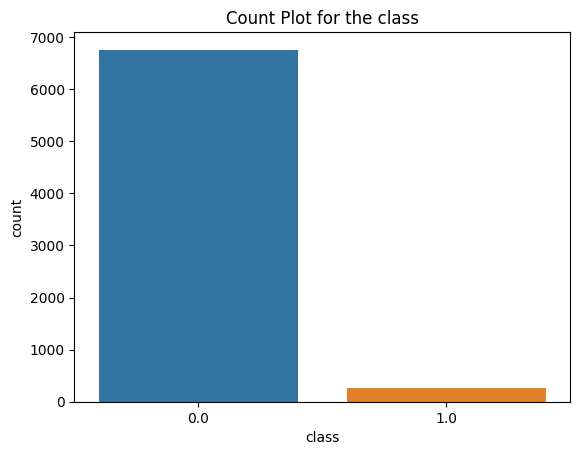

In [27]:
sns.countplot(x='class', data=df1)
plt.title('Count Plot for the class')
plt.show()

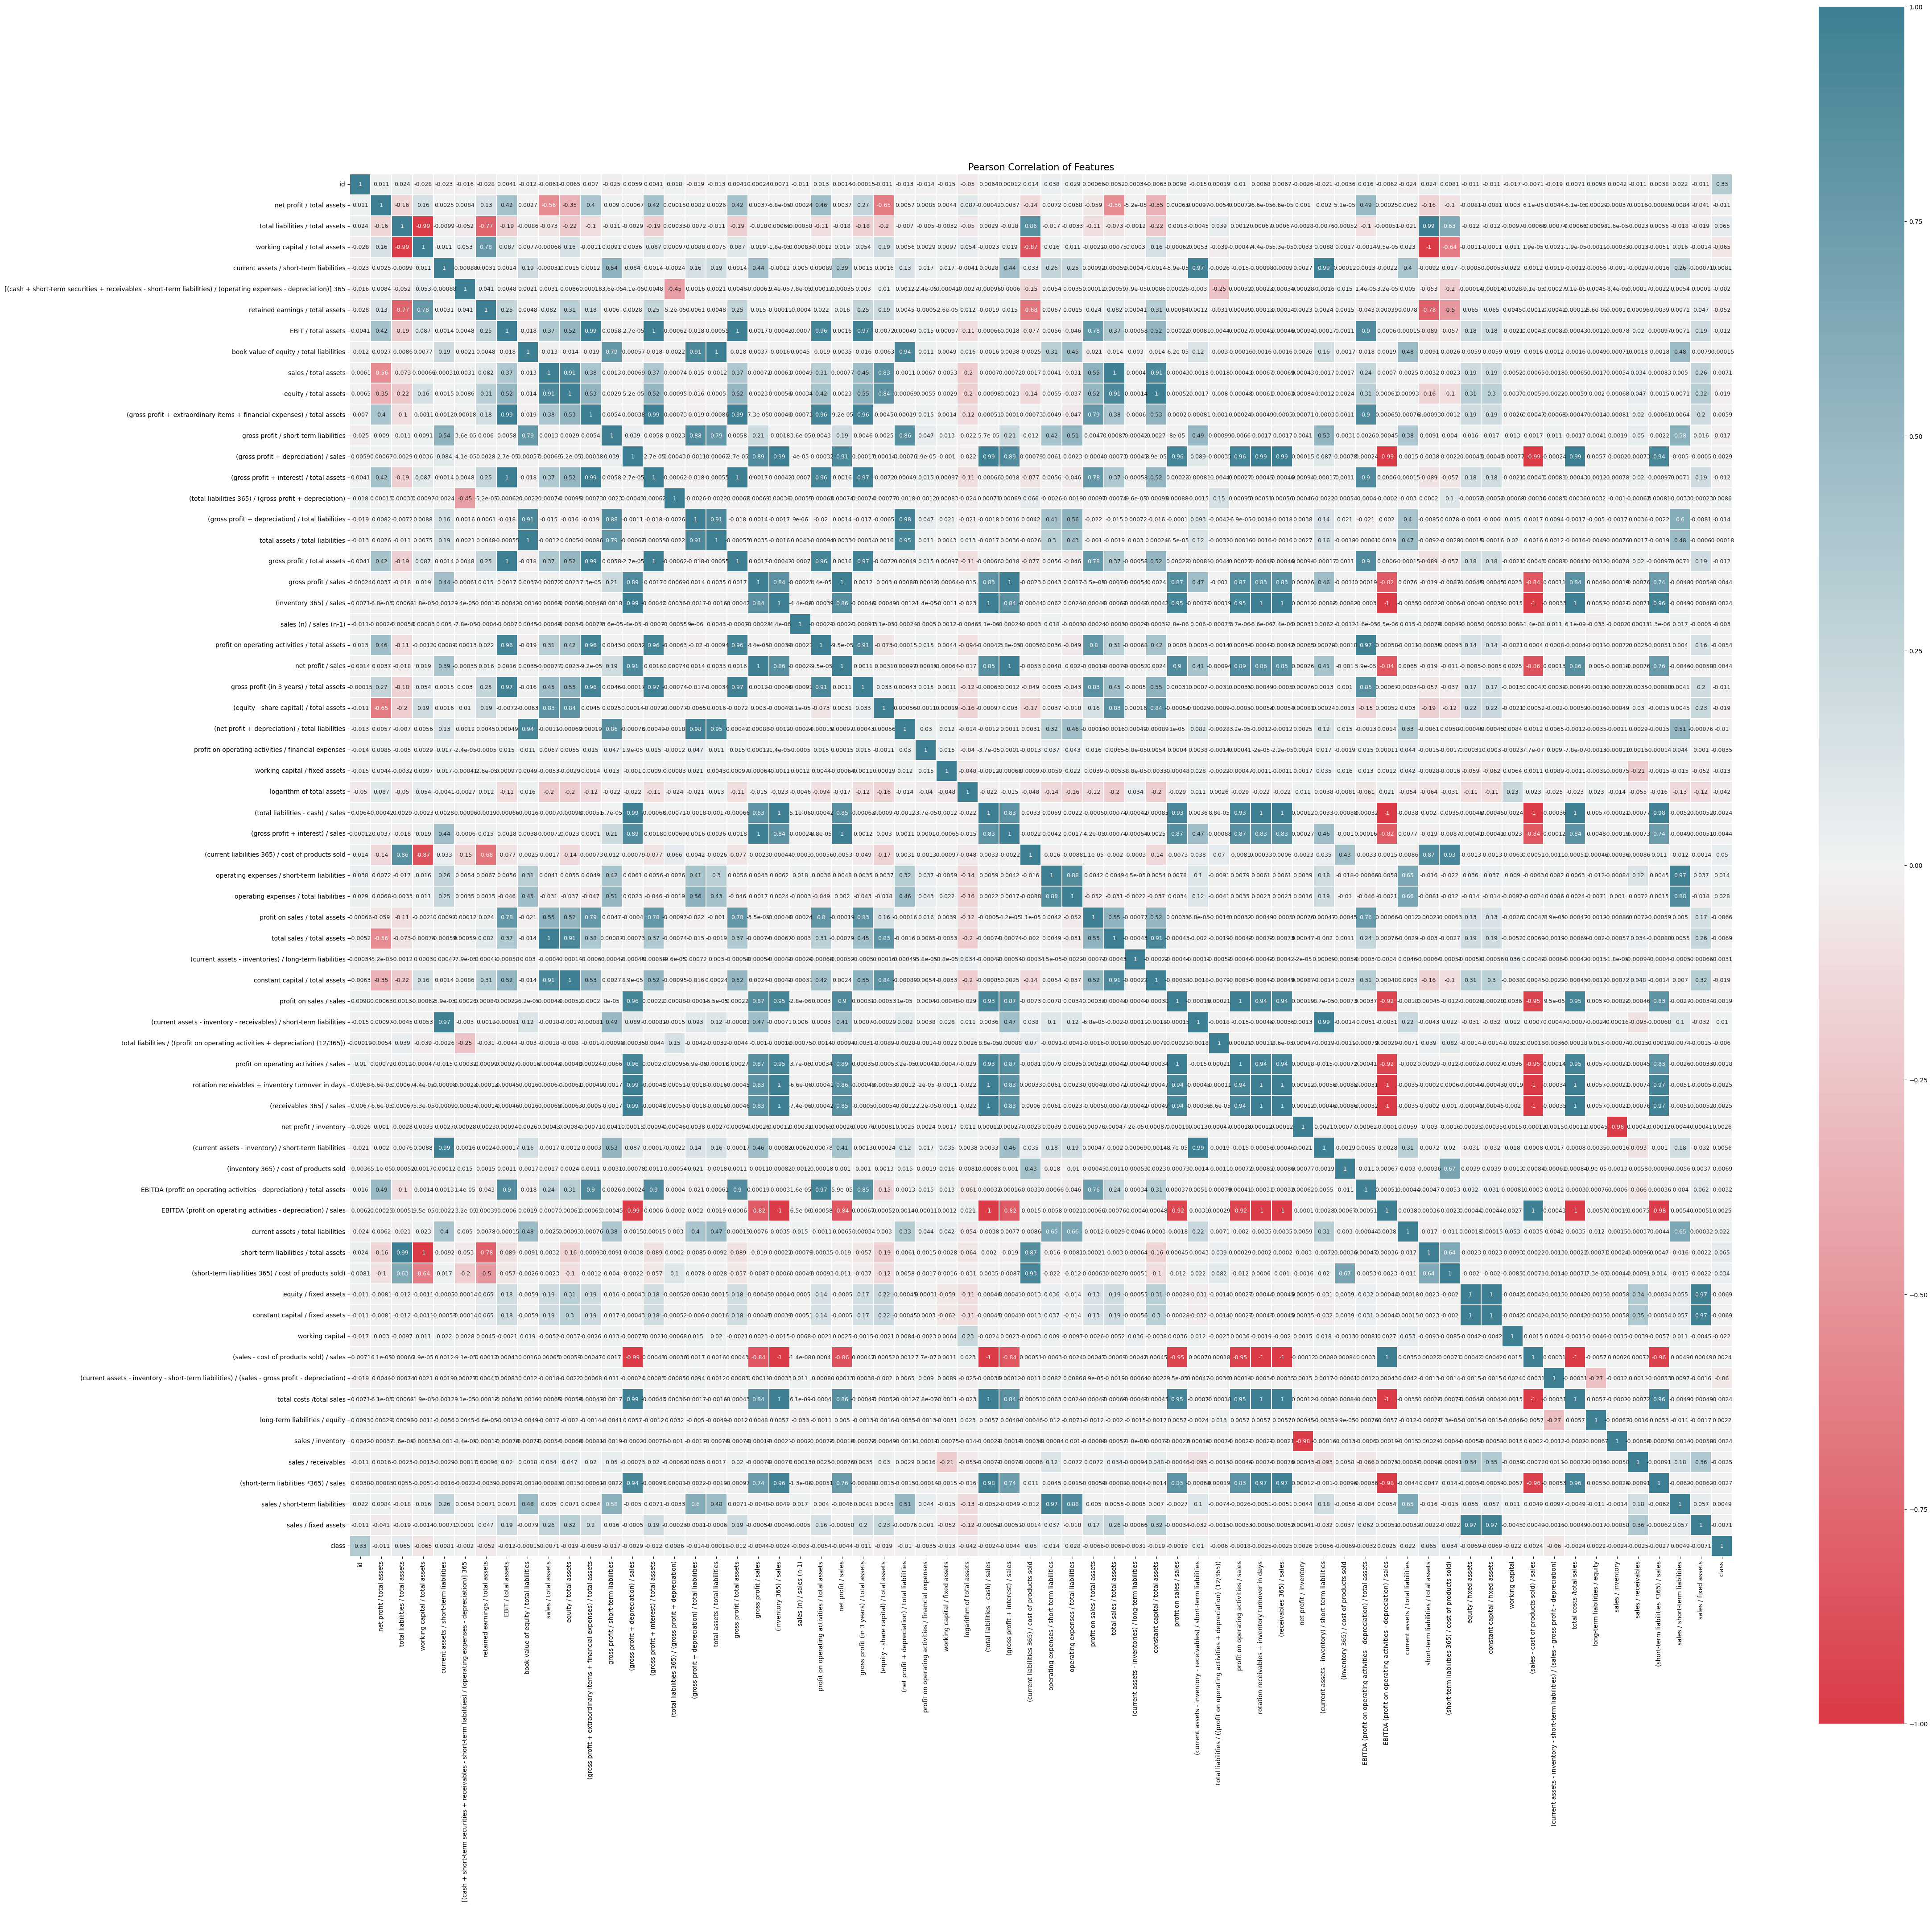

In [30]:
plt.figure(figsize=(50,50))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df1.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':9 })
plt.show()

In [31]:
sns.pairplot(df1, height=2.5)
plt.show()

Error in callback <function _draw_all_if_interactive at 0x79d8977bad40> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x79d8977b9fc0> (for post_execute):


KeyboardInterrupt: ignored